In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#plt.style.use('dark_background')
import warnings
warnings.filterwarnings(action='ignore')
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [26]:
df=pd.read_csv('Salary Data.csv',delim_whitespace=False)
df

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0
...,...,...,...,...,...,...
370,35.0,Female,Bachelor's,Senior Marketing Analyst,8.0,85000.0
371,43.0,Male,Master's,Director of Operations,19.0,170000.0
372,29.0,Female,Bachelor's,Junior Project Manager,2.0,40000.0
373,34.0,Male,Bachelor's,Senior Operations Coordinator,7.0,90000.0


In [27]:
df.isnull().sum()

Age                    2
Gender                 2
Education Level        2
Job Title              2
Years of Experience    2
Salary                 2
dtype: int64

In [28]:
df.dtypes

Age                    float64
Gender                  object
Education Level         object
Job Title               object
Years of Experience    float64
Salary                 float64
dtype: object

In [29]:
d=df.describe(include='all')
d

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
count,373.000000,373,373,373,373.000000,373.000000
unique,NaN,2,3,174,NaN,NaN
top,NaN,Male,Bachelor's,Director of Marketing,NaN,NaN
freq,NaN,194,224,12,NaN,NaN
mean,37.431635,NaN,NaN,NaN,10.030831,100577.345845
std,7.069073,NaN,NaN,NaN,6.557007,48240.013482
min,23.000000,NaN,NaN,NaN,0.000000,350.000000
25%,31.000000,NaN,NaN,NaN,4.000000,55000.000000
50%,36.000000,NaN,NaN,NaN,9.000000,95000.000000
75%,44.000000,NaN,NaN,NaN,15.000000,140000.000000


In [30]:

for i in ['Gender','Education Level','Job Title']:
    df[i].replace('?',d[i][2],inplace=True)
    print(i,":",sum(df[i]== "?"))

Gender : 0
Education Level : 0
Job Title : 0


In [42]:
for i in ['Gender','Education Level','Job Title']:
    df[i].replace(np.nan,d[i][2],inplace=True)
    print(i,":",sum(df[i]== np.nan))

Gender : 0
Education Level : 0
Job Title : 0


In [43]:
for i in ['Age','Years of Experience','Salary']:
    df[i].replace('?',d[i][4],inplace=True)
    print(i,":",sum(df[i]== "?"))

Age : 0
Years of Experience : 0
Salary : 0


In [45]:
for i in ['Age','Years of Experience','Salary']:
    df[i].replace(np.NaN,d[i][4],inplace=True)
    print(i,":",sum(df[i]== np.NaN))

Age : 0
Years of Experience : 0
Salary : 0


In [46]:
for i in df.columns:
    print(i,":",sum(df[i]== "?"))
    print(i,':',df[i].unique(),'\n')

Age : 0
Age : [32.         28.         45.         36.         52.         29.
 42.         31.         26.         38.         48.         35.
 40.         27.         44.         33.         39.         25.
 51.         34.         47.         30.         41.         37.
 24.         43.         50.         46.         49.         23.
 53.         37.43163539] 

Gender : 0
Gender : ['Male' 'Female'] 

Education Level : 0
Education Level : ["Bachelor's" "Master's" 'PhD'] 

Job Title : 0
Job Title : ['Software Engineer' 'Data Analyst' 'Senior Manager' 'Sales Associate'
 'Director' 'Marketing Analyst' 'Product Manager' 'Sales Manager'
 'Marketing Coordinator' 'Senior Scientist' 'Software Developer'
 'HR Manager' 'Financial Analyst' 'Project Manager' 'Customer Service Rep'
 'Operations Manager' 'Marketing Manager' 'Senior Engineer'
 'Data Entry Clerk' 'Sales Director' 'Business Analyst' 'VP of Operations'
 'IT Support' 'Recruiter' 'Financial Manager' 'Social Media Specialist'
 'Software 

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  375 non-null    float64
 1   Gender               375 non-null    object 
 2   Education Level      375 non-null    object 
 3   Job Title            375 non-null    object 
 4   Years of Experience  375 non-null    float64
 5   Salary               375 non-null    float64
dtypes: float64(3), object(3)
memory usage: 17.7+ KB


In [48]:
#Encoding
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df.Gender=le.fit_transform(df['Gender'])
df['Gender'].unique()

array([1, 0])

In [49]:
le.inverse_transform([1, 0])

array(['Male', 'Female'], dtype=object)

In [50]:
df['Education Level']=le.fit_transform(df['Education Level'])
df['Education Level'].unique()

array([0, 1, 2])

In [51]:
le.inverse_transform([0, 1, 2])

array(["Bachelor's", "Master's", 'PhD'], dtype=object)

In [52]:
df['Job Title']=le.fit_transform(df['Job Title'])
df['Job Title'].unique()

array([159,  17, 130, 101,  22,  81,  93, 104,  82, 150, 158,  40,  36,
        96,  13,  89,  83, 116,  18, 102,   3, 172,  44,  98,  37, 157,
       160,  57, 112,  92,   6,   1,  19,  84, 167,  39,  95,  16, 103,
       169,  88,  85,   2, 162,  10,   0,  29,  41,  12,   5,  34, 171,
        38, 170, 156,  30, 115,  47,  21,  43,  14,   4, 118, 173,  99,
       166,  11, 153,  42,   9, 165, 106,   8,  56,  35,  46, 144,  91,
       164, 134, 168, 100,  76,  97,  87,  94, 122,  80, 143,   7,  20,
        45, 131,  15, 120, 161, 163, 110,  62,  86,  90,  61, 141,  66,
       121, 105, 152,  79, 154, 146,  73,  64,  54, 142,  49, 148,  65,
        70, 109,  32,  71, 111, 139,  53, 129,  59, 138,  28,  77, 149,
        31,  52, 132, 125,  50, 108, 147,  60,  25,  63,  55, 136, 124,
       155,  69, 135, 128, 145,  33, 107,  23,  74, 126, 113,  27,  48,
        78, 133, 127, 117,  51,  75, 140,  68, 151,  72, 119, 123, 114,
        67,  26, 137,  58,  24])

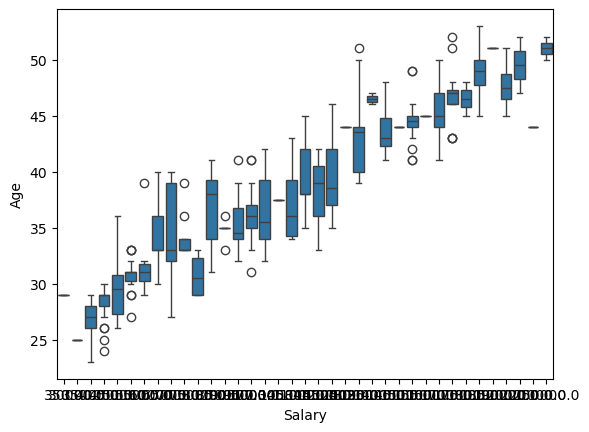

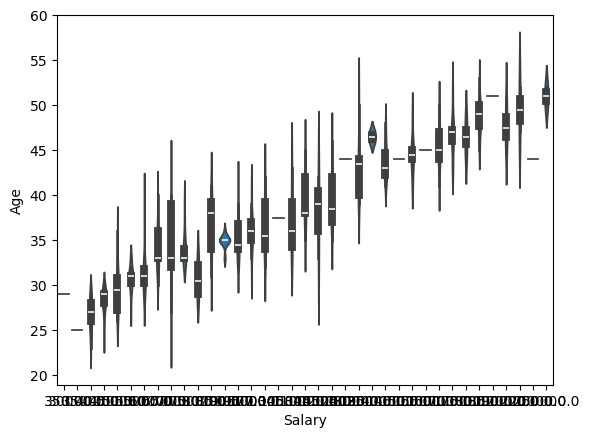

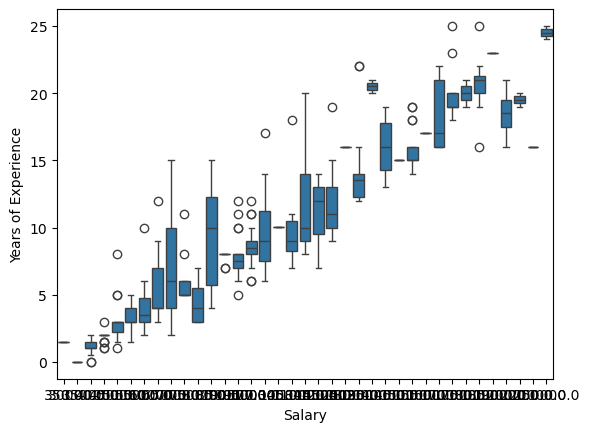

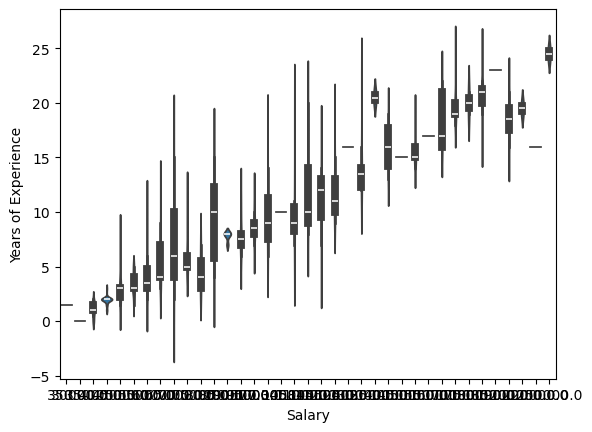

In [53]:
#data analysis 
for i in ['Age','Years of Experience']:
    sns.boxplot(x=df.Salary,y=df[i])
    plt.show()
    
    sns.violinplot(x=df.Salary,y=df[i])
    plt.show()

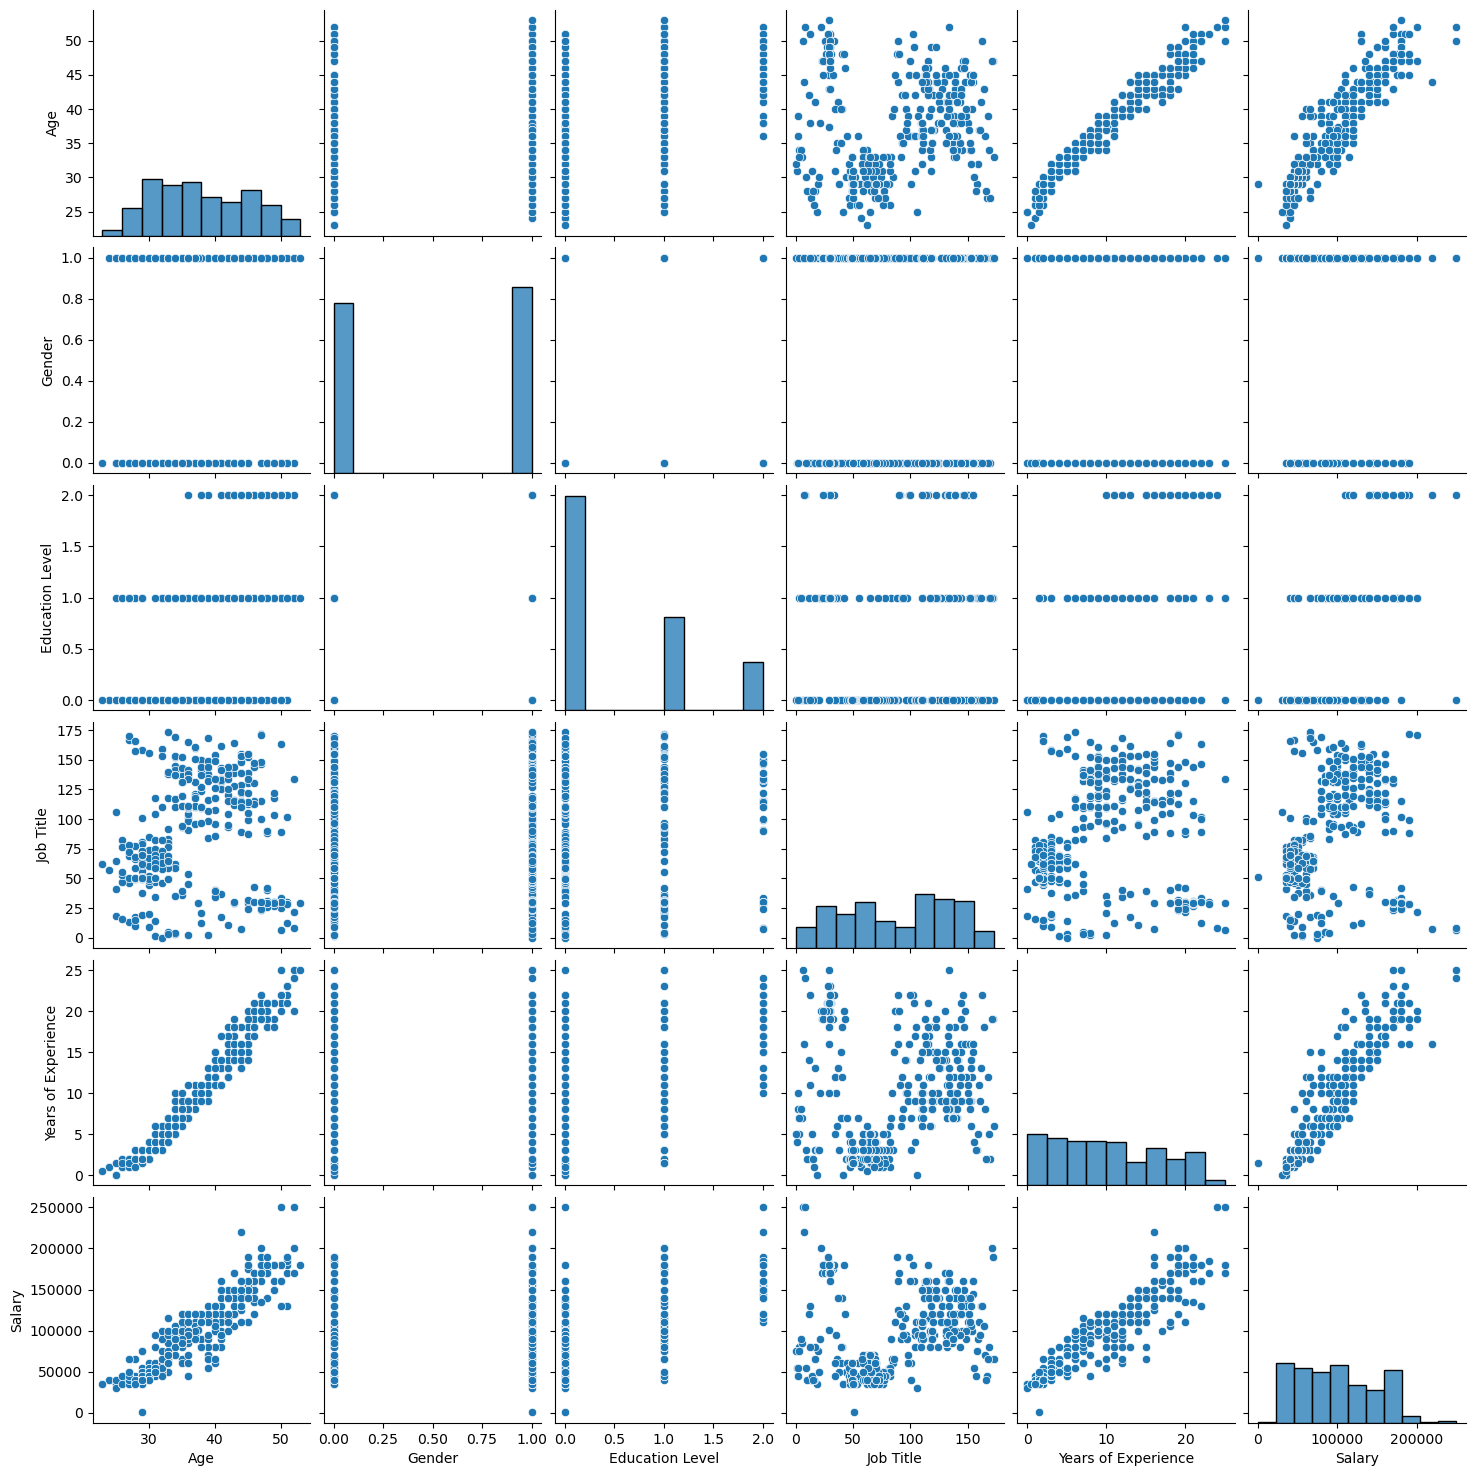

In [54]:
sns.pairplot(data=df)
plt.show()

In [55]:
ip=df.drop(columns=['Salary'],axis=1)
op=df['Salary']

In [56]:
from sklearn.model_selection import train_test_split as tts
X_train,X_test,Y_train,Y_test=tts(ip,op,test_size=0.2,random_state=42)

In [57]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

In [58]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,Y_train)

LinearRegression()

In [59]:
predict=lr.predict(X_test)
predict

array([170904.4288774 ,  94233.48088028, 131380.50431971,  83683.9492824 ,
       157585.97264167, 182454.19895709, 156303.5909456 , 104108.77079949,
        59833.84911001, 100141.67376823, 138864.7386044 , 159107.49691162,
        53712.47577702,  90651.53607681,  65387.35994972, 158742.80542475,
        71155.12036433,  49128.93438198,  81126.41705721,  97967.94365637,
       127571.50553956, 107363.36558743, 161408.42992288,  63029.63165698,
        89023.91670399,  50887.46201446, 173464.39309265,  94537.22075192,
       152968.23591742, 145178.25643279,  45913.2552096 , 124391.80972876,
        57289.90943186, 148754.91208396,  91006.21812505,  20193.81201552,
       179272.71511392,  53509.66774371,  40616.28138473,  61180.39439842,
        46612.46877781,  89791.73006835, 166956.49453009, 161710.74584979,
        45704.16074103, 152494.59216545, 120666.36615201,  54162.57974239,
        51695.83698548,  37833.48321524, 103969.99231254,  82148.46949232,
        78647.00394449, 1

In [60]:
from sklearn.metrics import mean_squared_error,r2_score
mse=mean_squared_error(predict,Y_test)
r2=r2_score(predict,Y_test)
print("mse ", mse)
print("r2 Score ", r2)

mse  244352852.88380158
r2 Score  0.8794097092962782


In [61]:
dfs=pd.DataFrame({'y_test':list(Y_test),'prediction':predict})
dfs

,y_test,prediction
0,150000.0,170904.428877
1,65000.0,94233.480880
2,125000.0,131380.504320
3,80000.0,83683.949282
4,140000.0,157585.972642
...,...,...
70,75000.0,72376.551560
71,90000.0,104926.874225
72,160000.0,151074.935932
73,150000.0,149931.198677


<function matplotlib.pyplot.show(close=None, block=None)>

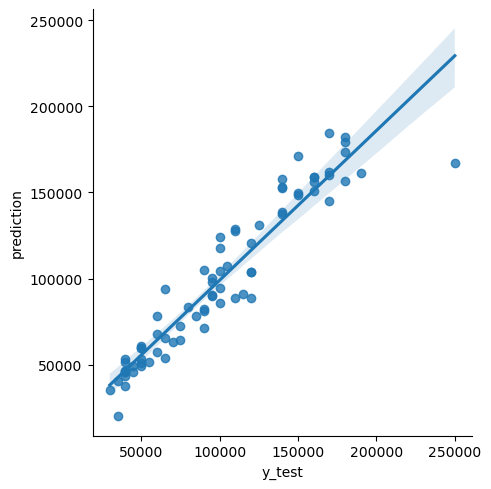

In [63]:
sns.lmplot(x='y_test',y='prediction',data=dfs)
plt.show